# Model Evaluation and Refinement

Estimated time needed: **30** minutes

## Objectives

- Evaluate and refine prediction models

## Table of Contents

- [Heading 1](#heading-1)

---

## Video Lessons

- <img src="https://user-images.githubusercontent.com/95575665/168158125-0d826c1a-ffea-4ea9-a2bc-f3b0f4f0b99a.png" alt="youtube-logo.png" width="15" height="10"> [Model Evaluation and Refinement](https://www.youtube.com/watch?v=FrS_7AtHk4g)
- <img src="https://user-images.githubusercontent.com/95575665/168158125-0d826c1a-ffea-4ea9-a2bc-f3b0f4f0b99a.png" alt="youtube-logo.png" width="15" height="10"> [Model Evaluation](https://www.youtube.com/watch?v=vnOJnMvIVAM)
- <img src="https://user-images.githubusercontent.com/95575665/168158125-0d826c1a-ffea-4ea9-a2bc-f3b0f4f0b99a.png" alt="youtube-logo.png" width="15" height="10"> [Overfitting, Underfitting and Model Selection](https://www.youtube.com/watch?v=Vkuab_ugPxI)
- <img src="https://user-images.githubusercontent.com/95575665/168158125-0d826c1a-ffea-4ea9-a2bc-f3b0f4f0b99a.png" alt="youtube-logo.png" width="15" height="10"> [Ridge Regression](https://www.youtube.com/watch?v=8aYzg2237Ek)
- <img src="https://user-images.githubusercontent.com/95575665/168158125-0d826c1a-ffea-4ea9-a2bc-f3b0f4f0b99a.png" alt="youtube-logo.png" width="15" height="10"> [Grid Search](https://www.youtube.com/watch?v=kXgvITm6CBM)

---

## Dataset

We will be using the following dataset.

- Data source: [module_5_auto.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv)
- Data type: CSV

In [1]:
## Data file in .csv format stored on the internet
file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

## Setup

In [2]:
## Install libraries using piplite when running the notebook in browser
# import piplite
# import micropip
# await piplite.install(['pandas'])
# await piplite.install(['matplotlib'])
# await piplite.install(['scipy', 'seaborn'])
# await piplite.install(['skillsnetwork'])
# await micropip.install(['ipywidgets'], keep_going=True)
# await micropip.install(['tqdm'], keep_going=True)

If the notebook is run locally using Anaconda, uncomment the following cell to load the correct libraries and versions.

In [3]:
## Install a specific version of libraries locally with Anaconda
# !mamba install pandas==1.3.3
# !mamba install numpy=1.21.2
# !mamba install scipy=1.7.1 -y
# !mamba install seaborn=0.9.0 -y
# !mamba install sklearn=0.20.1 -y
# !mamba install ipywidgets=7.4.2 -y
# !mamba install tqdm

This function will download the dataset into our browser.

In [4]:
## Download dataset into browser
# from pyodide.http import pyfetch

# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes())

We will need to download the [dataset](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv) if we run the notebook locally. Please comment out the following cell.

In [5]:
# await download(file_path, "auto.csv")
# file_path = "auto.csv"

In [6]:
import pandas as pd
import numpy as np
## Import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
## Show graphs inline
%matplotlib inline

In [8]:
## ipywidgets.interact() automatically creates user interface (UI) controls for exploring code and data interactively
from ipywidgets import interact, interactive, fixed, interact_manual

See [Using Interact documentation](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html).

In [9]:
## Utility for splitting data into train and test sets
from sklearn.model_selection import train_test_split

## Load Data

In [10]:
## Read a comma-separated values (CSV) file into DataFrame
df = pd.read_csv(file_path)

In [11]:
## Write object to a comma-separated values (CSV) file
df.to_csv('automobile-05.csv')

In [12]:
## Return the dtypes in the DataFrame
print(df.dtypes)
## Return the first N rows
print(df.head())

Unnamed: 0.1           int64
Unnamed: 0             int64
symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object
   Unnamed: 0.1  Unnamed: 0  symboling  normalized-losses         make  \
0            

Let's only use numeric data.

`_get_numeric_data()` is similar to `select_dtypes()`, which is ued to filter only numeric columns. It is undocumented.

> `select_dtypes()` return a subset of the DataFrame's columns based on the column dtypes.

In [13]:
df = df._get_numeric_data()
## Return the dtypes in the DataFrame
print(df.dtypes)
## Return the first N rows
print(df.head())

Unnamed: 0.1           int64
Unnamed: 0             int64
symboling              int64
normalized-losses      int64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
diesel                 int64
gas                    int64
dtype: object
   Unnamed: 0.1  Unnamed: 0  symboling  normalized-losses  wheel-base  \
0             0           0          3                122        88.6   
1             1           1          3                122        88.6   
2             2           2          1                122        94.5   
3             3           3          2                164        99.8   
4           

## Plotting Functions

In [14]:
def plot_distribution(func_red, func_blue, name_red, name_blue, title):
	width = 12
	height = 10
	## Create a new figure or activate an existing figure
	plt.figure(figsize=(width, height))
	## Plot a distribution plot without the histogram
	ax1 = sns.distplot(func_red, hist=False, color="r", label=name_red)
	ax2 = sns.distplot(func_blue, hist=False, color="b", label=name_blue, ax=ax1)
	## Set a title for the axes
	plt.title(title)
	## Set the label for the x-axis and y-axis
	plt.xlabel('Price (in dollars)')
	plt.ylabel('Proportion of Cars')
	plt.show()
	plt.close()

`seaborn.distplot()` has been deprecated.

In [15]:
def PollyPlot(x_train, x_test, y_train, y_test, lr, poly_transform):
	## lr: linear regression object
	width = 12
	height = 10
	## Create a new figure or activate an existing figure
	plt.figure(figsize=(width, height))
	
	## Dataframe
	# print(x_train)
	## Return a Numpy representation of the DataFrame
	# print(x_train.values)
	xmax = max([x_train.values.max(), x_test.values.max()])
	xmin = min([x_train.values.min(), x_test.values.min()])

	## Return evenly spaced values within a given interval
	x = np.arange(xmin, xmax, 0.1)
	## Plot y versus x as lines and/or markers
	plt.plot(x_train, y_train, 'ro', label='Training Data')
	plt.plot(x_test, y_test, 'go', label='Test Data')
	## Fit to data, then transform it
	plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
	## Get or set the y-limits of the current axes
	plt.ylim([-10000, 60000])
	## Set the label for the y-axis
	plt.ylabel('Price')
	## Place a legend on the Axes
	plt.legend()

## Part 01: Model Evaluation

### Training and Testing

An important step in testing a model is to split data into training and testing data. We will place the target data `price` in a separate Dataframe `y_data`.

In [16]:
y_data = df['price']

In [17]:
## Drop column
x_data = df.drop('price', axis=1)

Now, we randomly split our data into training and testing data using `train_test_split`.

In [18]:
## Split arrays or matrices into random train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print("Number of test samples:", x_test.shape[0])
print("Number of training samples:", x_train.shape[0])

Number of test samples: 21
Number of training samples: 180


The <b>test_size</b> parameter sets the proportion of data that is split into the testing set. In the above, the testing set is 10% of the total dataset.


Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following:  "x_train1" , "x_test1", "y_train1" and  "y_test1".

In [19]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("Number of test samples:", x_test1.shape[0])
print("Number of training samples:", x_train1.shape[0])

Number of test samples: 81
Number of training samples: 120


<details><summary>Click here for the solution</summary>

```python
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("Number of test samples:", x_test1.shape[0])
print("Number of training samples:", x_train1.shape[0])
```

</details>

Let's import <b>LinearRegression</b> from the module <b>linear_model</b>.


In [20]:
from sklearn.linear_model import LinearRegression

We create a Linear Regression object:


In [21]:
## ## Create linear regression model
lr_model = LinearRegression()
print(lr_model)

LinearRegression()


We fit the model using the feature "horsepower":


In [22]:
lr_model.fit(x_train[['horsepower']], y_train)

LinearRegression()

Let's calculate the R^2 on the test data:


In [23]:
lr_model.score(x_test[['horsepower']], y_test)

0.3635875575078824

We can see the R^2 is much smaller using the test data compared to the training data.


In [24]:
lr_model.score(x_train[['horsepower']], y_train)

0.6619724197515103

Find the R^2  on the test data using 40% of the dataset for testing.

In [25]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lr_model.fit(x_train1[['horsepower']], y_train1)
lr_model.score(x_test1[['horsepower']], y_test1)

0.7139364665406973

<details><summary>Click here for the solution</summary>

```python
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lr_model.fit(x_train1[['horsepower']], y_train1)
lr_model.score(x_test1[['horsepower']], y_test1)
```

</details>

Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation. Let's go over several methods that you can use for cross-validation.


### Cross-Validation Score

Let's import <b>model_selection</b> from the module <b>cross_val_score</b>.


In [26]:
from sklearn.model_selection import cross_val_score

We input the object, the feature ("horsepower"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4.


In [27]:
## Array of scores of the estimator for each run of the cross validation
r_scores = cross_val_score(lr_model, x_data[['horsepower']], y_data, cv=4)

The default scoring is R^2. Each element in the array has the average R^2 value for the fold:


In [28]:
r_scores

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

We can calculate the average and standard deviation of our estimate:


In [29]:
print("The mean of the folds are", r_scores.mean(), "and the standard deviation is", r_scores.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


We can use negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'.


In [30]:
-1 * cross_val_score(lr_model, x_data[['horsepower']], y_data, cv=4, scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature:

In [31]:
r_scores_2 = cross_val_score(lr_model, x_data[['horsepower']], y_data, cv=2)
r_scores_2.mean()

0.5166761697127429

<details><summary>Click here for the solution</summary>

```python
rc = cross_val_score(lr_model, x_data[['horsepower']], y_data, cv=2)
rc.mean()
```

</details>

You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training. First, import the function:


In [32]:
from sklearn.model_selection import cross_val_predict

We input the object, the feature <b>"horsepower"</b>, and the target data <b>y_data</b>. The parameter 'cv' determines the number of folds. In this case, it is 4. We can produce an output:


In [33]:
yhat = cross_val_predict(lr_model, x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

## Part 02: Overfitting, Underfitting and Model Selection

It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world.  One reason for this is overfitting.

Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

Let's create Multiple Linear Regression objects and train the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.


In [34]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

Prediction using training data:


In [35]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

Prediction using test data:


In [36]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Let's perform some model evaluation using our training and testing data separately.

Let's examine the distribution of the predicted values of the training data.

C:\Users\Asus\AppData\Local\Temp\ipykernel_20372\3672777967.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(func_red, hist=False, color="r", label=name_red)
C:\Users\Asus\AppData\Local\Temp\ipykernel_20372\3672777967.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.di

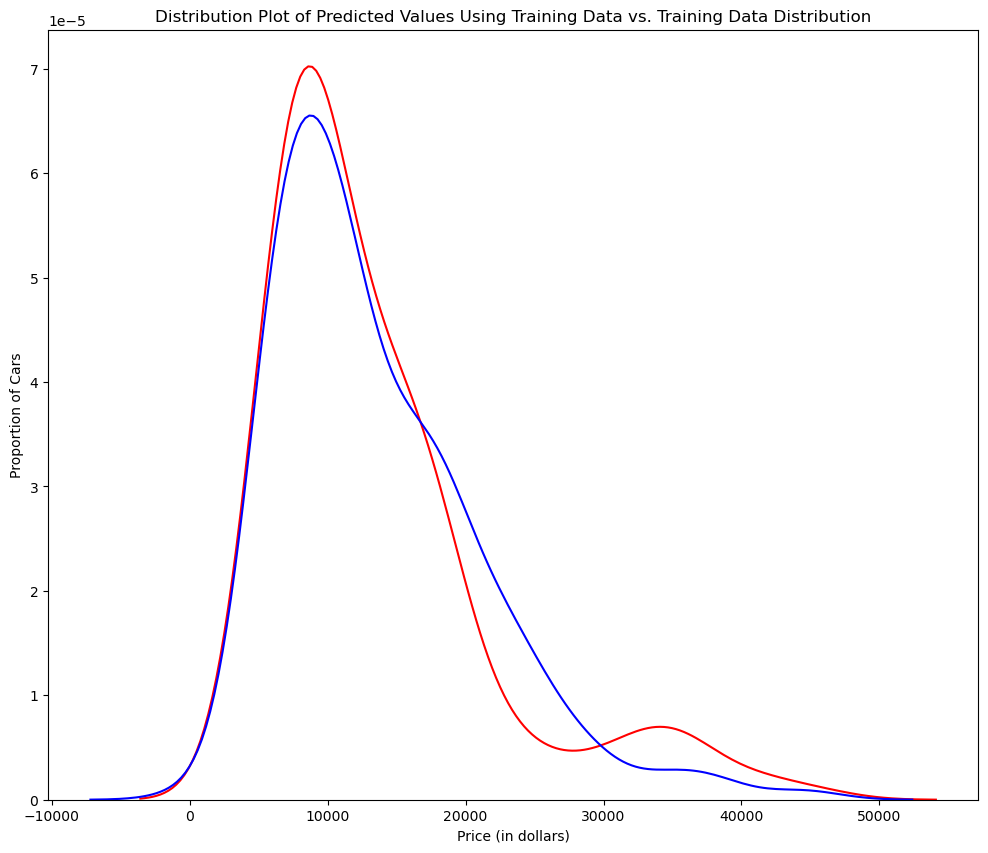

In [37]:
title = 'Distribution Plot of Predicted Values Using Training Data vs. Training Data Distribution'
plot_distribution(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.


So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.


C:\Users\Asus\AppData\Local\Temp\ipykernel_20372\3672777967.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(func_red, hist=False, color="r", label=name_red)
C:\Users\Asus\AppData\Local\Temp\ipykernel_20372\3672777967.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.di

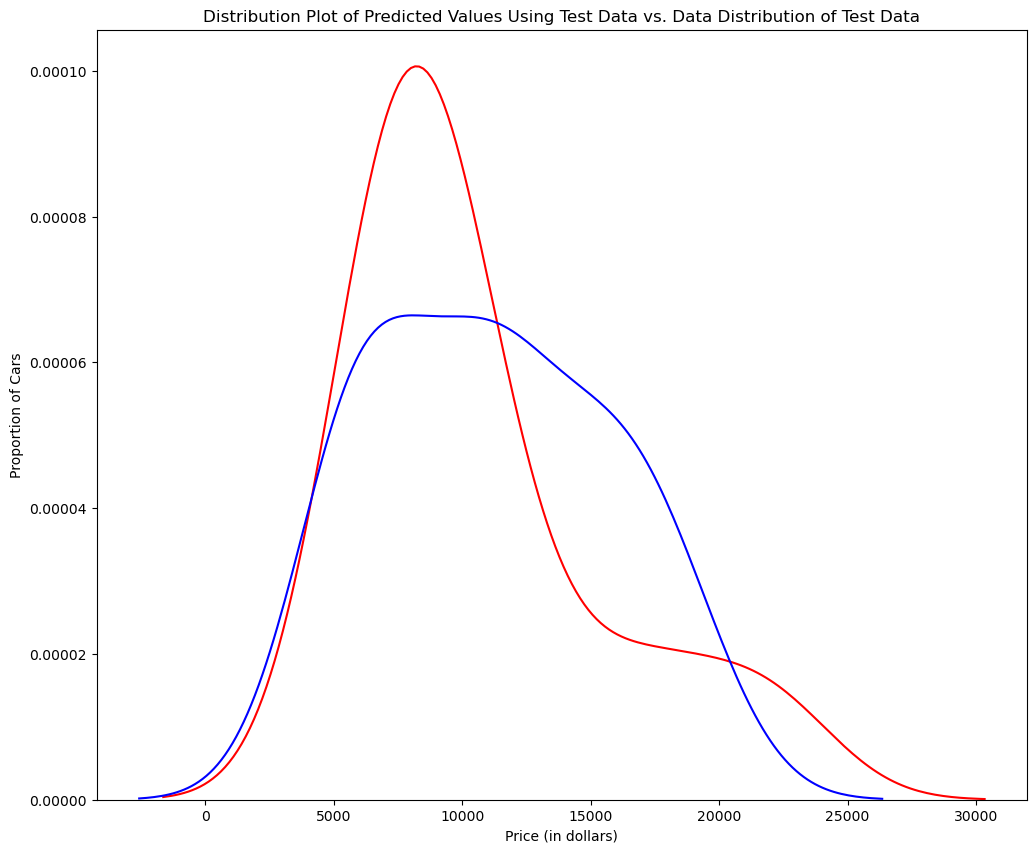

In [38]:
title = 'Distribution Plot of Predicted Values Using Test Data vs. Data Distribution of Test Data'
plot_distribution(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", title)

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.


<p>Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>


In [39]:
from sklearn.preprocessing import PolynomialFeatures

### Overfitting

Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.

Let's use 55 percent of the data for training and the rest for testing:


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will perform a degree 5 polynomial transformation on the feature <b>'horsepower'</b>.


In [41]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
print(pr)

PolynomialFeatures(degree=5)


Now, let's create a Linear Regression model "poly" and train it.


In [42]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

We can see the output of our model using the method "predict." We assign the values to "yhat".


In [43]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.70501896,  7308.02845162, 12213.7843307 , 18893.19108677,
       19995.88963424])

Let's take the first five predicted values and compare it to the actual targets.


In [44]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.70501896  7308.02845162 12213.7843307  18893.19108677]
True values: [ 6295. 10698. 13860. 13499.]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.


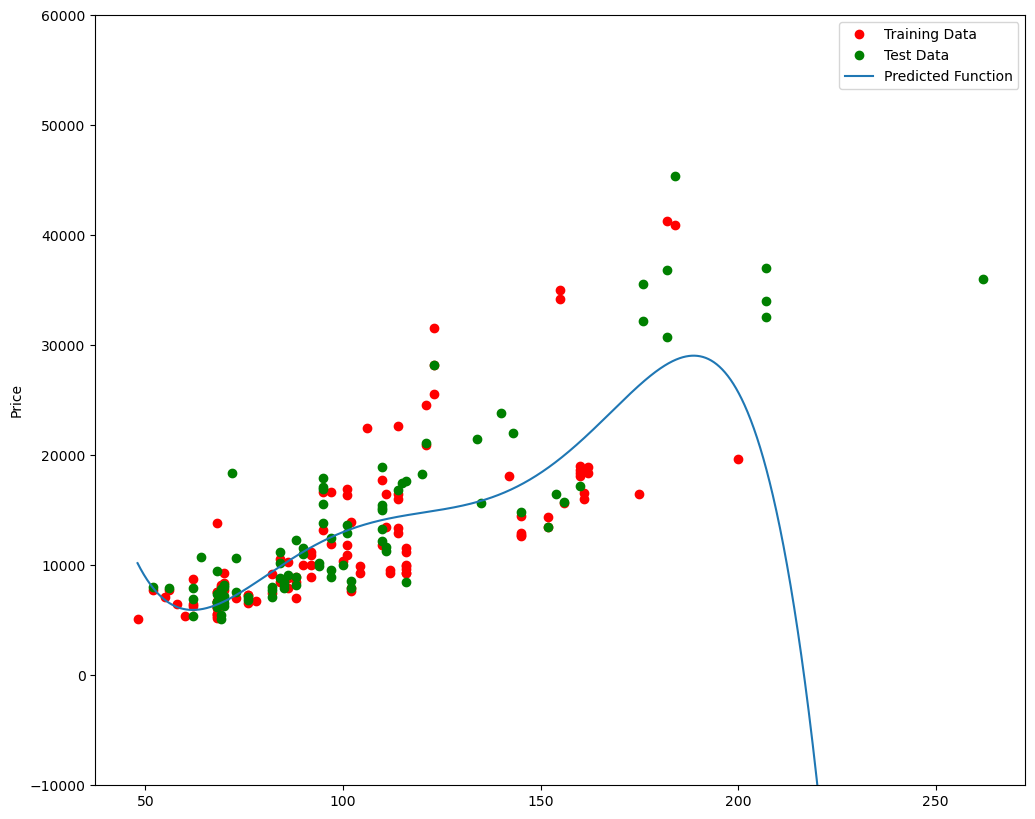

In [45]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.


We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.


R^2 of the training data:


In [46]:
poly.score(x_train_pr, y_train)

0.5567716902635091

R^2 of the test data:


In [47]:
poly.score(x_test_pr, y_test)

-29.871418859187518

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.


Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:


Text(3, 0.75, 'Maximum R^2')

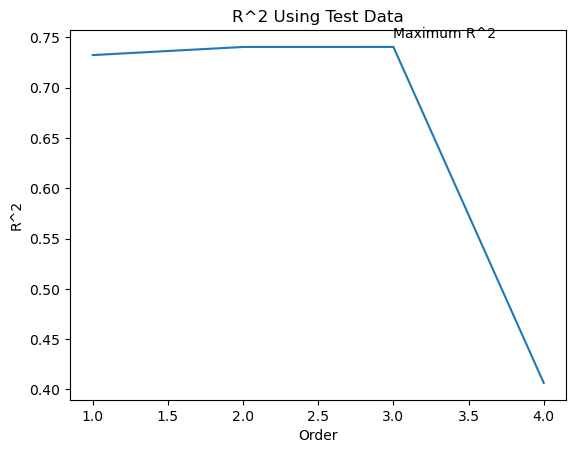

In [48]:
r_squ_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    r_squ_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, r_squ_test)
plt.xlabel('Order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2')    

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.


The following function will be used in the next section. Please run the cell below.


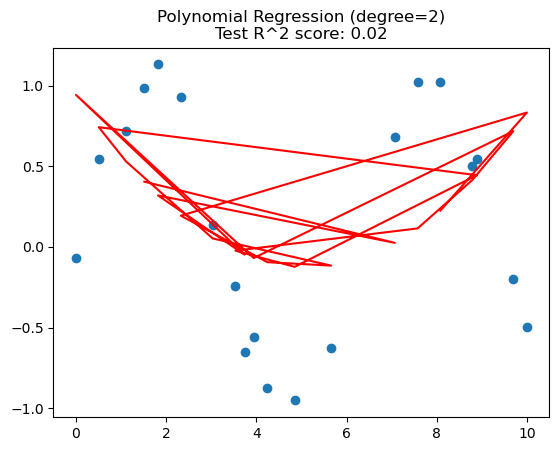

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate some sample data
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, size=len(x))

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create polynomial features for training and test sets
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
X_test_poly = poly.transform(x_test.reshape(-1, 1))

# Fit linear regression model to training data
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# Predict on test data and calculate R^2 score
y_pred = lin_reg.predict(X_test_poly)
r2_score = lin_reg.score(X_test_poly, y_test)

# Plot the test data and polynomial fit
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')
plt.title(f"Polynomial Regression (degree=2)\nTest R^2 score: {r2_score:.2f}")
plt.show()

In [50]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    # Create polynomial features for training and test sets
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
    X_test_poly = poly.transform(x_test.reshape(-1, 1))

    # Fit linear regression model to training data
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)

    # Predict on test data and calculate R^2 score
    y_pred = lin_reg.predict(X_test_poly)
    r2_score = lin_reg.score(X_test_poly, y_test)

    # Plot the test data and polynomial fit
    plt.scatter(x_test, y_test)
    plt.plot(x_test, y_pred, color='red')
    plt.title(f"Polynomial Regression (degree=2)\nTest R^2 score: {r2_score:.2f}")
    plt.show()

The following interface allows you to experiment with different polynomial orders and different amounts of data.


In [51]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.

<details><summary>Click here for the solution</summary>

```python
pr1=PolynomialFeatures(degree=2)
```

</details>

Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".

<details><summary>Click here for the solution</summary>

```python
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
```

</details>

How many dimensions does the new feature have? Hint: use the attribute "shape".

<details><summary>Click here for the solution</summary>

```python
x_train_pr1.shape #there are now 15 features
```

</details>

Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.

<details><summary>Click here for the solution</summary>

```python
poly1 = LinearRegression().fit(x_train_pr1, y_train)
```

</details>

Use the method  "predict" to predict an output on the polynomial features, then use the function "plot_distribution" to display the distribution of the predicted test output vs. the actual test data.

<details><summary>Click here for the solution</summary>

```python
yhat_test1 = poly1.predict(x_test_pr1)

title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'

plot_distribution(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", title)
```

</details>

Using the distribution plot above, describe (in words) the two regions where the predicted prices are less accurate than the actual prices.

In [52]:
# Write your code below and press Shift+Enter to execute 
# The predicted value is higher than actual value for cars where the price $10,000 range, conversely the predicted price is lower than the price cost in the $30,000 to $40,000 range. As such the model is not as accurate in these ranges.

<details><summary>Click here for the solution</summary>

```python
print("predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)
```

</details>

## Part 03: Ridge Regression

In this section, we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.


Let's perform a degree two polynomial transformation on our data.


In [53]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])

C:\Users\Asus\AppData\Local\Temp\ipykernel_20372\402838403.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Let's import  <b>Ridge</b>  from the module <b>linear models</b>.


In [ ]:
from sklearn.linear_model import Ridge

Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1


In [ ]:
## Ridge regression model
RigeModel = Ridge(alpha=1)

Like regular regression, you can fit the model using the method <b>fit</b>.


In [ ]:
RigeModel.fit(x_train_pr, y_train)

Similarly, you can obtain a prediction:


In [ ]:
yhat = RigeModel.predict(x_test_pr)

Let's compare the first five predicted samples to our test set:


In [ ]:
print('Predicted:', yhat[0:4])
print('Test set:', y_test[0:4].values)

We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.


In [ ]:
from tqdm import tqdm

r_squ_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0, 1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    r_squ_test.append(test_score)
    Rsqu_train.append(train_score)

We can plot out the value of R^2 for different alphas:


In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
plt.plot(Alpha, r_squ_test, label='Validation Data')
plt.plot(Alpha, Rsqu_train, 'r', label='Training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Figure 4**: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.


Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.


Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.

<details><summary>Click here for the solution</summary>

```python
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)
```

</details>

## Part 04: Grid Search

The term alpha is a hyperparameter. Sklearn has the class <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.


Let's import <b>GridSearchCV</b> from  the module <b>model_selection</b>.


In [ ]:
from sklearn.model_selection import GridSearchCV

We create a dictionary of parameter values:


In [ ]:
parameters1 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

Create a Ridge regression object:


In [ ]:
RR = Ridge()
RR

Create a ridge grid search object:


In [ ]:
Grid1 = GridSearchCV(RR, parameters1, cv=4)


Fit the model:


In [ ]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:


In [ ]:
BestRR = Grid1.best_estimator_
BestRR

We now test our model on the test data:


In [ ]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

---

Author(s):

- [Joseph Santarcangelo](https://www.linkedin.com/in/joseph-s-50398b136)

Contributor(s):

- [Mahdi Noorian PhD](https://www.linkedin.com/in/mahdi-noorian-58219234)
- Bahare Talayian
- Eric Xiao
- Steven Dong
- Parizad
- Hima Vasudevan
- [Fiorella Wenver](https://www.linkedin.com/in/fiorellawever)
- [Yi Yao](https://www.linkedin.com/in/yi-leng-yao-84451275)